In [1]:
import pandas as pd
import string as st
import matplotlib
import numpy as np
import os
from sklearn import decomposition, metrics, cluster

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
#Enter the 'year', i.e. '2000', '2007', or '2014', of citation data that you want to look at
def make_JMatrix(year):
    #Create list of Journal file names
    Jlist = os.listdir('../data/Cogs_'+year+'/Cited_'+year)
    if '.DS_Store' in Jlist:
        Jlist.remove('.DS_Store')
    Jlist.sort()

    jj=''.join(Jlist)
    Jabbr=jj.split(".csv")
    Jabbr=Jabbr[:-1] #for some reason the loop can't run bc there is some '' blank entry in the list

    #Creates Dictionary for mapping file name to file abbreviation
    JDict_map=dict(zip(Jabbr, Jlist))
    df_names=Jlist
    JMatrix=pd.DataFrame(data=np.zeros((len(Jlist),len(Jlist))), index=df_names, columns= df_names)

    data_folder = '../data/Cogs_'+year+'/Cited_'+year+'/'
    for i, Ji in enumerate(Jlist):
        print(i, Ji)
        file = open(data_folder+Jlist[i],'r')
        data = pd.read_csv(file)[:-2]    
        for j, Jj in enumerate(Jlist):
            #j_abbr = Jj.split('.csv')[0]
            num_j_cited_i_row = data[data['Unnamed: 2']==Jabbr[j]]['Unnamed: 3']
            try:
                num_j_cited_i = int(num_j_cited_i_row)
            except:
                num_j_cited_i = 0        

            JMatrix[Jlist[i]][JDict_map[Jabbr[j]]] = num_j_cited_i

    # each column is the incoming citations INTO that journal (at col j)
    # Looking at the parent journal cognitive sci the which is at the top of this graph,
    # the journals on the left are citing the journals at the top x number of times from 2007 and all prev years
    # THE DATABASE, JCReport, calls these "Citation Values"

    plt.figure(figsize=(10,10))
    plt.imshow(np.log(JMatrix))
    return JMatrix

0 AM J PSYCHOL.csv
1 AM PSYCHOL.csv
2 BEHAV BRAIN SCI.csv
3 BEHAV PROCESS.csv
4 BRIT J PSYCHOL.csv
5 CHILD DEV.csv
6 COGNITION INSTRUCT.csv
7 COGNITION.csv
8 COGNITIVE PSYCHOL.csv
9 COGNITIVE SCI.csv
10 CONTEMP EDUC PSYCHOL.csv
11 DEV PSYCHOL.csv
12 DEV REV.csv
13 HUM FACTORS.csv
14 INT J HUM-COMPUT ST.csv
15 INT J SCI EDUC.csv
16 J CHILD LANG.csv
17 J COMP PSYCHOL.csv
18 J COMPUT ASSIST LEAR.csv
19 J EDUC PSYCHOL.csv
20 J EXP PSYCHOL ANIM B.csv
21 J EXP PSYCHOL GEN.csv
22 J EXP PSYCHOL LEARN.csv
23 J HUM EVOL.csv
24 J LEARN SCI.csv
25 J MEM LANG.csv
26 J PERS SOC PSYCHOL.csv
27 J PRAGMATICS.csv
28 J PSYCHOLINGUIST RES.csv
29 J RES SCI TEACH.csv
30 LEARN INSTR.csv
31 MEM COGNITION.csv
32 MONOGR SOC RES CHILD.csv
33 ORGAN BEHAV HUM DEC.csv
34 PHILOS PSYCHOL.csv
35 PSYCHOL REV.csv
36 PSYCHOL SCI.csv
37 PSYCHON B REV.csv
38 TRAV HUMAIN.csv
0 AM J PSYCHOL.csv
1 BEHAV BRAIN SCI.csv
2 BEHAV RES METHODS.csv


/Users/rdgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


3 BRAIN LANG.csv
4 BRIT J PSYCHOL.csv
5 COGN LINGUIST.csv
6 COGN SYST RES.csv
7 COGNITION.csv
8 COGNITIVE PSYCHOL.csv
9 COGNITIVE SCI.csv
10 COMPUT EDUC.csv
11 COMPUT HUM BEHAV.csv
12 CONTEMP EDUC PSYCHOL.csv
13 DEV PSYCHOL.csv
14 DEVELOPMENTAL SCI.csv
15 EDUC PSYCHOL REV.csv
16 ETR&D-EDUC TECH RES.csv
17 INT J HUM-COMPUT ST.csv
18 INT J SCI EDUC.csv
19 J CHILD LANG.csv
20 J COGNITIVE NEUROSCI.csv
21 J EDUC PSYCHOL.csv
22 J ENG EDUC.csv
23 J EXP PSYCHOL GEN.csv
24 J EXP PSYCHOL HUMAN.csv
25 J EXP PSYCHOL LEARN.csv
26 J LEARN SCI.csv
27 J MEM LANG.csv
28 J PERS SOC PSYCHOL.csv
29 LANG COGNITIVE PROC.csv
30 LEARN INSTR.csv
31 MEM COGNITION.csv
32 PSYCHOL BULL.csv
33 PSYCHOL LEARN MOTIV.csv
34 PSYCHOL REV.csv
35 PSYCHOL SCI.csv
36 PSYCHON B REV.csv
37 Q J EXP PSYCHOL.csv
38 THINK REASONING.csv
39 TRENDS COGN SCI.csv
0 ACTA PSYCHOL.csv
1 BEHAV BRAIN SCI.csv
2 CHILD DEV.csv
3 COGN NEUROPSYCHOL.csv
4 COGN PROCESS.csv
5 COGNITION.csv
6 COGNITIVE PSYCHOL.csv
7 COGNITIVE SCI.csv
8 COMPUT EDUC.c

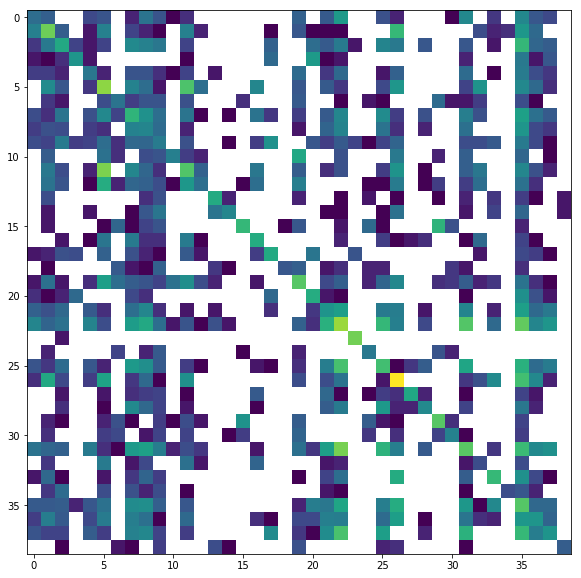

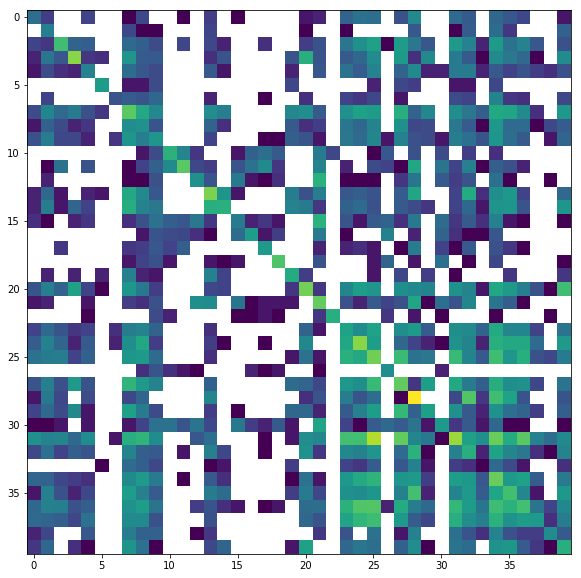

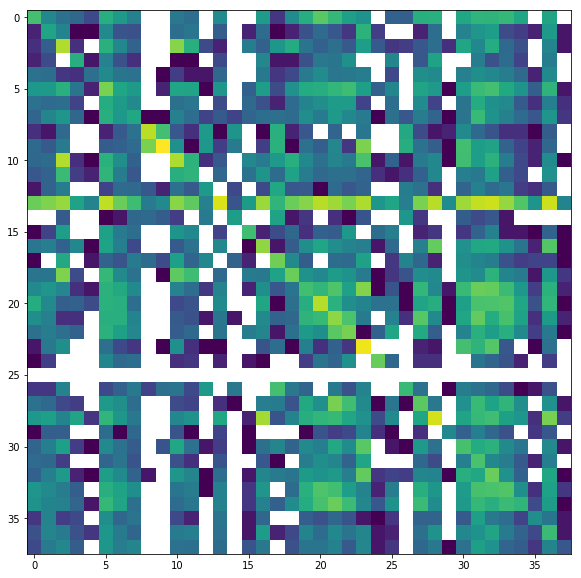

In [55]:
# run for all 3 years and save out
for year in ['2000', '2007', '2014']:
    JMatrix = make_JMatrix(year)
    JMatrix.to_csv('../data/citationMatrices/'+year)

# Decomposition & Visualization in 2D

COGNITIVE SCI


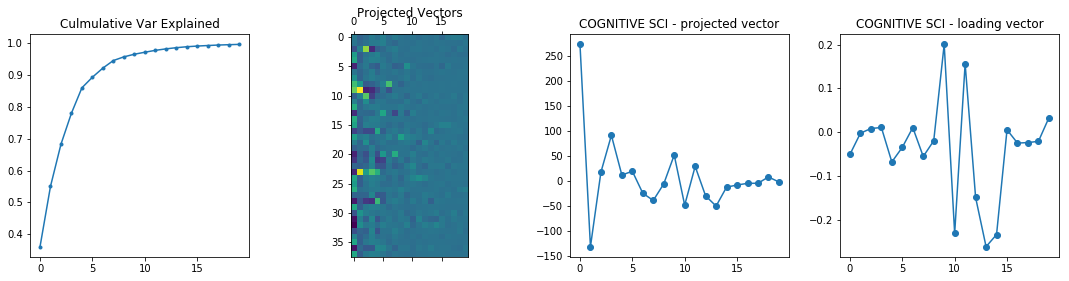

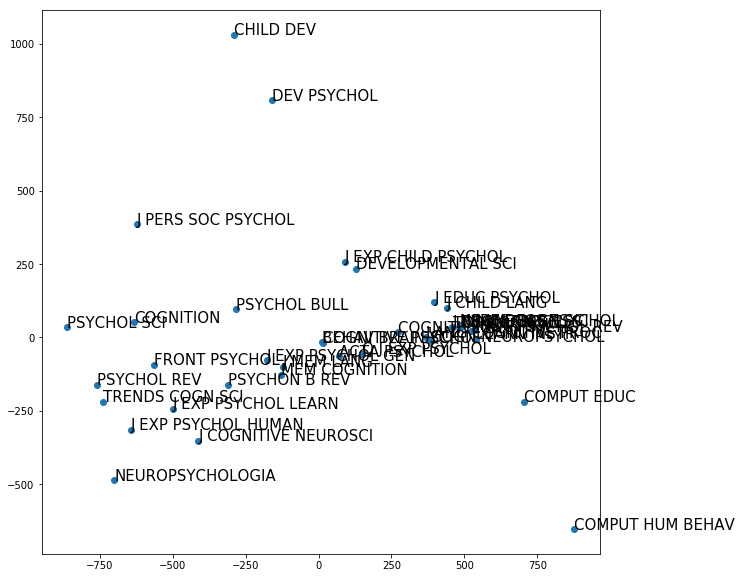

In [110]:
year = '2014'
JMatrix = pd.read_csv('../data/citationMatrices/'+year, index_col=0)
jlist = [j.split('.')[0] for j in JMatrix.index]
#print(jlist)
# SVD and PCA gives essentially the same answer, as it should, with rotational indeterminancy
#citation_svd = decomposition.TruncatedSVD(n_components=20)
citation_svd = decomposition.PCA(n_components=20, whiten=False)

# apply matrix factorization to citation matrix
JMatrix_reduced = citation_svd.fit_transform(JMatrix.as_matrix().T)

# how many components required to capture 95% variance?
#np.where(np.cumsum(citation_svd.explained_variance_ratio_)>=0.95)[0][0]

# cog sci is element 9
ctr_j=7
print(jlist[ctr_j])
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.plot(np.cumsum(citation_svd.explained_variance_ratio_),'.-')
plt.title('Culmulative Var Explained')
plt.subplot(1,4,2)
plt.matshow(JMatrix_reduced, fignum=False)
plt.title('Projected Vectors')
plt.subplot(1,4,3)
# Cogsci's projected/reduced vector
plt.plot(JMatrix_reduced[ctr_j,:],'-o')
plt.title(jlist[ctr_j]+' - projected vector')
# Cogsci's component weights
plt.subplot(1,4,4)
plt.plot(citation_svd.components_[:,ctr_j],'-o');
plt.title(jlist[ctr_j]+' - loading vector')
plt.tight_layout()

plot_dims = [0,2]
JMatrix2D = decomposition.PCA(n_components=3, whiten=False).fit_transform(JMatrix.as_matrix().T)
plt.figure(figsize=(10,10))
plt.plot(JMatrix2D[:,plot_dims[0]],JMatrix2D[:,plot_dims[1]],'o')
for i in range(JMatrix2D.shape[0]):
    plt.text(JMatrix2D[i,plot_dims[0]],JMatrix2D[i,plot_dims[1]], jlist[i], fontsize=15)

# k-Means Clustering 

In [111]:
n_clusters = 8
clu = cluster.KMeans(n_clusters=n_clusters)

clu.fit(JMatrix_reduced)
clu_label = clu.labels_
clu_inds = np.argsort(clu_label)
clu_label
clustered_J = [[jlist[i] for i in np.where(clu_label==query_clu)[0]] for query_clu in range(n_clusters)]
pd.DataFrame([t for t in clustered_J], index=['Clu%i'%i for i in range(n_clusters)]).T

,Clu0,Clu1,Clu2,Clu3,Clu4,Clu5,Clu6,Clu7
0,ACTA PSYCHOL,COGNITION,COMPUT HUM BEHAV,CHILD DEV,J PERS SOC PSYCHOL,COGN NEUROPSYCHOL,J COGNITIVE NEUROSCI,COMPUT EDUC
1,BEHAV BRAIN SCI,FRONT PSYCHOL,None,DEV PSYCHOL,None,COGN PROCESS,NEUROPSYCHOLOGIA,None
2,COGNITIVE PSYCHOL,J EXP PSYCHOL HUMAN,None,None,None,COGNITIVE SCI,None,None
3,DEVELOPMENTAL SCI,J EXP PSYCHOL LEARN,None,None,None,EDUC PSYCHOL REV,None,None
4,J EXP CHILD PSYCHOL,PSYCHOL REV,None,None,None,INSTR SCI,None,None
5,J EXP PSYCHOL GEN,PSYCHOL SCI,None,None,None,J CHILD LANG,None,None
6,J MEM LANG,TRENDS COGN SCI,None,None,None,J EDUC PSYCHOL,None,None
7,MEM COGNITION,None,None,None,None,J PHONETICS,None,None
8,PSYCHOL BULL,None,None,None,None,LANG COGNITIVE PROC,None,None
9,PSYCHON B REV,None,None,None,None,LEARN INSTR,None,None


In [ ]:
2000 cited = 1194
2000 citing = 1457   4 issues a year

2007 cited = 2093
2007 citing = 2031   6 issues a year

2014 cited = 3916
2014 citing = 4092   8 issues a year